In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.3


In [2]:
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [3]:
raw_df = pd.read_csv('basic_movie_data.csv')
raw_df.sample(5)

,name,url,file_size,domestic_total_gross,distributor,release_date,genre,runtime,mpaa_rating,production_budget
3761,florencefosterjenkins,http://www.boxofficemojo.com/movies/?id=floren...,20842,"$27,383,770",Paramount,"August 12, 2016",Drama,1 hrs. 50 min.,PG-13,$29 million
2802,sanandreas,http://www.boxofficemojo.com/movies/?id=sanand...,26083,"$155,190,832",Warner Bros. (New Line),"May 29, 2015",Action,1 hrs. 54 min.,PG-13,$110 million
5023,brubaker,http://www.boxofficemojo.com/movies/?id=brubak...,18298,"$37,121,708",Fox,"June 20, 1980",Drama,2 hrs. 12 min.,R,NaN
5033,startrek6,http://www.boxofficemojo.com/movies/?id=startr...,25614,"$74,888,996",Paramount,"December 6, 1991",Sci-Fi Adventure,1 hrs. 53 min.,PG,NaN
3640,dogsofwar,http://www.boxofficemojo.com/movies/?id=dogsof...,16640,"$5,484,132",MGM,"February 13, 1981",Unknown,1 hrs. 59 min.,R,NaN


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6926 entries, 0 to 6925
Data columns (total 10 columns):
name                    6926 non-null object
url                     6926 non-null object
file_size               6926 non-null int64
domestic_total_gross    6788 non-null object
distributor             6926 non-null object
release_date            6926 non-null object
genre                   6926 non-null object
runtime                 6875 non-null object
mpaa_rating             6926 non-null object
production_budget       2629 non-null object
dtypes: int64(1), object(9)
memory usage: 541.2+ KB


In [5]:
raw_df_subset = raw_df.dropna(subset=['production_budget','domestic_total_gross'])
raw_df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2605 entries, 6 to 6923
Data columns (total 10 columns):
name                    2605 non-null object
url                     2605 non-null object
file_size               2605 non-null int64
domestic_total_gross    2605 non-null object
distributor             2605 non-null object
release_date            2605 non-null object
genre                   2605 non-null object
runtime                 2601 non-null object
mpaa_rating             2605 non-null object
production_budget       2605 non-null object
dtypes: int64(1), object(9)
memory usage: 223.9+ KB


In [14]:
import re

def parse_dollar_string(string):
    if type(string) != str: return string
    unit = 1e6 if 'million' in string else 1
    if ':' in string: string = string.split(':')[0]
    parsed_string = re.sub(r"[^0-9.]?", "", string)
    n = float(parsed_string)
    if n * unit > 1e9:
        print(string)
    return n * unit

In [15]:
df = raw_df_subset.copy()
df['production_budget'] = raw_df_subset.production_budget.apply(parse_dollar_string).astype(float)
df['domestic_total_gross'] = raw_df_subset.domestic_total_gross.apply(parse_dollar_string).astype(float)

In [19]:
df['gross_to_budget_ratio'] = df.domestic_total_gross / df.production_budget
df['gross_minus_budget'] = df.domestic_total_gross - df.production_budget

In [20]:
df.sort_values('gross_to_budget_ratio', ascending=False).head(10)

,name,url,file_size,domestic_total_gross,distributor,release_date,genre,runtime,mpaa_rating,production_budget,gross_to_budget_ratio,gross_minus_budget
4348,paranormalactivity,http://www.boxofficemojo.com/movies/?id=parano...,29252,107918810.0,Paramount,"September 25, 2009",Horror,1 hrs. 39 min.,R,15000.0,7194.587333,107903810.0
3625,newlinehorror2015,http://www.boxofficemojo.com/movies/?id=newlin...,21824,22764410.0,Warner Bros. (New Line),"July 10, 2015",Horror,1 hrs. 21 min.,R,100000.0,227.644100,22664410.0
1933,clerks,http://www.boxofficemojo.com/movies/?id=clerks...,20900,3151130.0,Miramax,"October 19, 1994",Comedy,1 hrs. 32 min.,R,27000.0,116.708519,3124130.0
4487,napoleondynamite,http://www.boxofficemojo.com/movies/?id=napole...,26884,44540956.0,Fox Searchlight,"June 11, 2004",Comedy,1 hrs. 26 min.,PG,400000.0,111.352390,44140956.0
5224,once,http://www.boxofficemojo.com/movies/?id=once.htm,20173,9439923.0,Fox Searchlight,"May 16, 2007",Music Drama,1 hrs. 25 min.,R,150000.0,62.932820,9289923.0
2743,openwater,http://www.boxofficemojo.com/movies/?id=openwa...,25403,30610863.0,Lions Gate,"August 6, 2004",Horror,1 hrs. 19 min.,R,500000.0,61.221726,30110863.0
6622,devilinside,http://www.boxofficemojo.com/movies/?id=devili...,26185,53261944.0,Paramount,"January 6, 2012",Horror,1 hrs. 27 min.,R,1000000.0,53.261944,52261944.0
5704,saw,http://www.boxofficemojo.com/movies/?id=saw.htm,29483,55185045.0,Lions Gate,"October 29, 2004",Horror,1 hrs. 40 min.,R,1200000.0,45.987538,53985045.0
785,snowwhite,http://www.boxofficemojo.com/movies/?id=snowwh...,19405,66596803.0,Disney,"December 21, 1937",Animation,1 hrs. 23 min.,G,1499000.0,44.427487,65097803.0
3830,brothersmcmullen,http://www.boxofficemojo.com/movies/?id=brothe...,19597,10426506.0,Fox Searchlight,"August 11, 1995",Comedy,1 hrs. 38 min.,R,238000.0,43.808849,10188506.0


In [21]:
df.sort_values('gross_minus_budget', ascending=False).head(10)

,name,url,file_size,domestic_total_gross,distributor,release_date,genre,runtime,mpaa_rating,production_budget,gross_to_budget_ratio,gross_minus_budget
6418,starwars7,http://www.boxofficemojo.com/movies/?id=starwa...,53067,936662225.0,Buena Vista,"December 18, 2015",Sci-Fi Fantasy,2 hrs. 16 min.,PG-13,245000000.0,3.823111,691662225.0
5720,avatar,http://www.boxofficemojo.com/movies/?id=avatar...,56984,749766139.0,Fox,"December 18, 2009",Sci-Fi Adventure,2 hrs. 40 min.,PG-13,237000000.0,3.163570,512766139.0
6635,jurassicpark4,http://www.boxofficemojo.com/movies/?id=jurass...,45119,652270625.0,Universal,"June 12, 2015",Action / Adventure,2 hrs. 4 min.,PG-13,150000000.0,4.348471,502270625.0
4193,avengers11,http://www.boxofficemojo.com/movies/?id=avenge...,53870,623357910.0,Buena Vista,"May 4, 2012",Action / Adventure,2 hrs. 22 min.,PG-13,220000000.0,2.833445,403357910.0
4665,titanic,http://www.boxofficemojo.com/movies/?id=titani...,44670,600788188.0,Paramount,"December 19, 1997",Romance,3 hrs. 14 min.,PG-13,200000000.0,3.003941,400788188.0
1025,et,http://www.boxofficemojo.com/movies/?id=et.htm,37645,359197037.0,Universal,"June 11, 1982",Family Adventure,1 hrs. 57 min.,PG,10500000.0,34.209242,348697037.0
3253,darkknight,http://www.boxofficemojo.com/movies/?id=darkkn...,51942,533345358.0,Warner Bros.,"July 18, 2008",Action / Adventure,2 hrs. 30 min.,PG-13,185000000.0,2.882948,348345358.0
234,beautyandthebeast2017,http://www.boxofficemojo.com/movies/?id=beauty...,47435,504014165.0,Buena Vista,"March 17, 2017",Fantasy,2 hrs. 9 min.,PG,160000000.0,3.150089,344014165.0
435,starwars2016,http://www.boxofficemojo.com/movies/?id=starwa...,43675,532177324.0,Buena Vista,"December 16, 2016",Sci-Fi Adventure,2 hrs. 13 min.,PG-13,200000000.0,2.660887,332177324.0
5780,hungergames,http://www.boxofficemojo.com/movies/?id=hunger...,47800,408010692.0,Lionsgate,"March 23, 2012",Action / Adventure,2 hrs. 22 min.,PG-13,78000000.0,5.230906,330010692.0


In [33]:
df.sort_values('gross_minus_budget', ascending=True).head(10)

,name,url,file_size,domestic_total_gross,distributor,release_date,genre,runtime,mpaa_rating,production_budget,gross_to_budget_ratio,gross_minus_budget
2719,johncarterofmars,http://www.boxofficemojo.com/movies/?id=johnca...,28942,73078100.0,Buena Vista,"March 9, 2012",Sci-Fi Adventure,2 hrs. 12 min.,PG-13,250000000.0,0.292312,-176921900.0
1747,battleship,http://www.boxofficemojo.com/movies/?id=battle...,28976,65422625.0,Universal,"May 18, 2012",Action,2 hrs. 11 min.,PG-13,209000000.0,0.313027,-143577375.0
4402,47ronin,http://www.boxofficemojo.com/movies/?id=47roni...,23680,38362475.0,Universal,"December 25, 2013",Action Drama,2 hrs. 7 min.,PG-13,175000000.0,0.219214,-136637525.0
409,kingarthur2016,http://www.boxofficemojo.com/movies/?id=kingar...,25600,39175066.0,Warner Bros.,"May 12, 2017",Adventure,2 hrs. 6 min.,PG-13,175000000.0,0.223858,-135824934.0
932,jackthegiantkiller,http://www.boxofficemojo.com/movies/?id=jackth...,28465,65187603.0,Warner Bros. (New Line),"March 1, 2013",Adventure,1 hrs. 54 min.,PG-13,195000000.0,0.334295,-129812397.0
6840,jupiterascending,http://www.boxofficemojo.com/movies/?id=jupite...,25950,47387723.0,Warner Bros.,"February 6, 2015",Sci-Fi,2 hrs. 7 min.,PG-13,176000000.0,0.269248,-128612277.0
4785,marsneedsmoms,http://www.boxofficemojo.com/movies/?id=marsne...,26176,21392758.0,Buena Vista,"March 11, 2011",Animation,1 hrs. 28 min.,PG,150000000.0,0.142618,-128607242.0
1112,13thwarrior,http://www.boxofficemojo.com/movies/?id=13thwa...,23539,32698899.0,Buena Vista,"August 27, 1999",Period Adventure,1 hrs. 42 min.,R,160000000.0,0.204368,-127301101.0
5283,loneranger,http://www.boxofficemojo.com/movies/?id=lonera...,28762,89302115.0,Buena Vista,"July 3, 2013",Western,2 hrs. 29 min.,PG-13,215000000.0,0.415359,-125697885.0
126,alexander,http://www.boxofficemojo.com/movies/?id=alexan...,34731,34297191.0,Warner Bros.,"November 24, 2004",Historical Epic,2 hrs. 56 min.,R,155000000.0,0.221272,-120702809.0


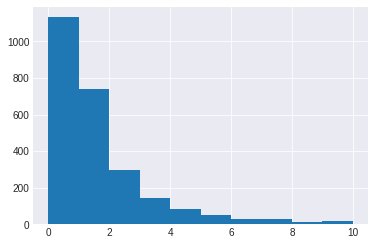

In [32]:
df[df.gross_to_budget_ratio < 10].gross_to_budget_ratio.hist(bins=[0,1,2,3,4,5,6,7,8,9,10])

In [39]:
df.gross_minus_budget.median()

4907715.0

In [43]:
linear_model = pm.Model()

with linear_model:
    beta = pm.Normal('beta', mu=1, sd=1000, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1000)
    mu = beta[0] + beta[1]*df.production_budget
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=df.gross_to_budget_ratio)
    trace = pm.sample(20000)
    pm.traceplot(trace);
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_log__, beta, alpha]
  1%|▏         | 279/20500 [00:00<00:38, 519.80it/s]


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/home/dan/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/home/dan/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x7f6808457930, file "/...3.6/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/dan/anaconda3/lib/python3.6/site-packages/ipykernel/__pycache__/__main__.cpython-36.pyc', '__doc__': None, '__file__': '/home/dan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/home/dan/an.../python3.6/site-packages/ipykernel/kernelapp.py'>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py'), pkg_name='ipykernel', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7f6808457930, file "/...3.6/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/dan/anaconda3/lib/python3.6/site-packages/ipykernel/__pycache__/__main__.cpython-36.pyc', '__doc__': None, '__file__': '/home/dan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/home/dan/an.../python3.6/site-packages/ipykernel/kernelapp.py'>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py in <module>()
      1 if __name__ == '__main__':
      2     from ipykernel import kernelapp as app
----> 3     app.launch_new_instance()

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'linear_model = pm.Model()\n\nwith linear_model:\n  ... = pm.sample(20000)\n    pm.traceplot(trace);\n    ', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 24, 0, 5, 7, 803171, tzinfo=tzutc()), 'msg_id': '82EA5E7E579C428D8FC49171B9B8B56C', 'msg_type': 'execute_request', 'session': 'DAB874070A66433A8092FA1B13A54654', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '82EA5E7E579C428D8FC49171B9B8B56C', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'DAB874070A66433A8092FA1B13A54654']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'linear_model = pm.Model()\n\nwith linear_model:\n  ... = pm.sample(20000)\n    pm.traceplot(trace);\n    ', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 24, 0, 5, 7, 803171, tzinfo=tzutc()), 'msg_id': '82EA5E7E579C428D8FC49171B9B8B56C', 'msg_type': 'execute_request', 'session': 'DAB874070A66433A8092FA1B13A54654', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '82EA5E7E579C428D8FC49171B9B8B56C', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'DAB874070A66433A8092FA1B13A54654'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'linear_model = pm.Model()\n\nwith linear_model:\n  ... = pm.sample(20000)\n    pm.traceplot(trace);\n    ', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 24, 0, 5, 7, 803171, tzinfo=tzutc()), 'msg_id': '82EA5E7E579C428D8FC49171B9B8B56C', 'msg_type': 'execute_request', 'session': 'DAB874070A66433A8092FA1B13A54654', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '82EA5E7E579C428D8FC49171B9B8B56C', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='linear_model = pm.Model()\n\nwith linear_model:\n  ... = pm.sample(20000)\n    pm.traceplot(trace);\n    ', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'linear_model = pm.Model()\n\nwith linear_model:\n  ... = pm.sample(20000)\n    pm.traceplot(trace);\n    '
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('linear_model = pm.Model()\n\nwith linear_model:\n  ... = pm.sample(20000)\n    pm.traceplot(trace);\n    ',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('linear_model = pm.Model()\n\nwith linear_model:\n  ... = pm.sample(20000)\n    pm.traceplot(trace);\n    ',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='linear_model = pm.Model()\n\nwith linear_model:\n  ... = pm.sample(20000)\n    pm.traceplot(trace);\n    ', store_history=True, silent=False, shell_futures=True)
   2693                 self.displayhook.exec_result = result
   2694 
   2695                 # Execute the user code
   2696                 interactivity = "none" if silent else self.ast_node_interactivity
   2697                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2698                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2699                 
   2700                 self.last_execution_succeeded = not has_raised
   2701 
   2702                 # Reset this so later displayed values do not modify the

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.With object>], cell_name='<ipython-input-43-4d42446aad61>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7f67bc417cc0, executi..._before_exec=None error_in_exec=None result=None>)
   2797 
   2798         try:
   2799             for i, node in enumerate(to_run_exec):
   2800                 mod = ast.Module([node])
   2801                 code = compiler(mod, cell_name, "exec")
-> 2802                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f67b62495d0, file "<ipython-input-43-4d42446aad61>", line 3>
        result = <ExecutionResult object at 7f67bc417cc0, executi..._before_exec=None error_in_exec=None result=None>
   2803                     return True
   2804 
   2805             for i, node in enumerate(to_run_interactive):
   2806                 mod = ast.Interactive([node])

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f67b62495d0, file "<ipython-input-43-4d42446aad61>", line 3>, result=<ExecutionResult object at 7f67bc417cc0, executi..._before_exec=None error_in_exec=None result=None>)
   2857         outflag = True  # happens in more places, so it's easier as default
   2858         try:
   2859             try:
   2860                 self.hooks.pre_run_code_hook()
   2861                 #rprint('Running code', repr(code_obj)) # dbg
-> 2862                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f67b62495d0, file "<ipython-input-43-4d42446aad61>", line 3>
        self.user_global_ns = {'In': ['', "import numpy as np\nimport pandas as pd\nimport ma...nt('Running on PyMC3 v{}'.format(pm.__version__))", "get_ipython().magic('matplotlib inline')\nplt.style.use('seaborn-darkgrid')", "raw_df = pd.read_csv('basic_movie_data.csv')\nraw_df.sample(5)", 'raw_df.info()', "raw_df_subset = raw_df.dropna(subset=['productio...et','domestic_total_gross'])\nraw_df_subset.info()", 'import re\n\ndef parse_dollar_string(string):\n    ...\n        print(parsed_string)\n    return n * unit', "df['production_budget'] = raw_df_subset.producti...al_gross.apply(parse_dollar_string).astype(float)", "df = raw_df_subset.copy()\ndf['production_budget'...al_gross.apply(parse_dollar_string).astype(float)", '# parse_dollar_string("$66,596,803")\nraw_df.iloc[0]', '# parse_dollar_string("$66,596,803")\nraw_df.iloc[1000].domestic_total_gross', '# parse_dollar_string("$66,596,803")\nparse_dollar_string(raw_df.iloc[1000].domestic_total_gross)', 'import re\n\ndef parse_dollar_string(string):\n    ... > 1e9:\n        print(string)\n    return n * unit', "df = raw_df_subset.copy()\ndf['production_budget'...al_gross.apply(parse_dollar_string).astype(float)", 'import re\n\ndef parse_dollar_string(string):\n    ... > 1e9:\n        print(string)\n    return n * unit', "df = raw_df_subset.copy()\ndf['production_budget'...al_gross.apply(parse_dollar_string).astype(float)", "df['gross_to_budget_ratio'] = df.domestic_total_gross / df.production_budget", "df.sort_values('gross_to_budget_ratio', ascending=False).head(10)", "df.sort_values('domestic_total_gross', ascending=False).head(10)", "df['gross_to_budget_ratio'] = df.domestic_total_... = df.domestic_total_gross - df.production_budget", ...], 'Out': {3:                        name  \
3761  florencefos...n  1 hrs. 59 min.           R               NaN  , 9: name                                            ...                       NaN
Name: 0, dtype: object, 10: '$37,047,880', 11: 37047880.0, 17:                     name                        ...
3830           238000.0              43.808849  , 18:                        name  \
6418             ...         1.836023  
311                1.792556  , 20:                     name                        ...00.0              43.808849          10188506.0  , 21:                        name  \
6418             ...5780               5.230906         330010692.0  , 22: <matplotlib.axes._subplots.AxesSubplot object>, 23: <matplotlib.axes._subplots.AxesSubplot object>, ...}, 'Y_obs': Y_obs, '_': 4907715.0, '_10': '$37,047,880', '_11': 37047880.0, '_17':                     name                        ...
3830           238000.0              43.808849  , '_18':                        name  \
6418             ...         1.836023  
311                1.792556  , '_20':                     name                        ...00.0              43.808849          10188506.0  , '_21':                        name  \
6418             ...5780               5.230906         330010692.0  , ...}
        self.user_ns = {'In': ['', "import numpy as np\nimport pandas as pd\nimport ma...nt('Running on PyMC3 v{}'.format(pm.__version__))", "get_ipython().magic('matplotlib inline')\nplt.style.use('seaborn-darkgrid')", "raw_df = pd.read_csv('basic_movie_data.csv')\nraw_df.sample(5)", 'raw_df.info()', "raw_df_subset = raw_df.dropna(subset=['productio...et','domestic_total_gross'])\nraw_df_subset.info()", 'import re\n\ndef parse_dollar_string(string):\n    ...\n        print(parsed_string)\n    return n * unit', "df['production_budget'] = raw_df_subset.producti...al_gross.apply(parse_dollar_string).astype(float)", "df = raw_df_subset.copy()\ndf['production_budget'...al_gross.apply(parse_dollar_string).astype(float)", '# parse_dollar_string("$66,596,803")\nraw_df.iloc[0]', '# parse_dollar_string("$66,596,803")\nraw_df.iloc[1000].domestic_total_gross', '# parse_dollar_string("$66,596,803")\nparse_dollar_string(raw_df.iloc[1000].domestic_total_gross)', 'import re\n\ndef parse_dollar_string(string):\n    ... > 1e9:\n        print(string)\n    return n * unit', "df = raw_df_subset.copy()\ndf['production_budget'...al_gross.apply(parse_dollar_string).astype(float)", 'import re\n\ndef parse_dollar_string(string):\n    ... > 1e9:\n        print(string)\n    return n * unit', "df = raw_df_subset.copy()\ndf['production_budget'...al_gross.apply(parse_dollar_string).astype(float)", "df['gross_to_budget_ratio'] = df.domestic_total_gross / df.production_budget", "df.sort_values('gross_to_budget_ratio', ascending=False).head(10)", "df.sort_values('domestic_total_gross', ascending=False).head(10)", "df['gross_to_budget_ratio'] = df.domestic_total_... = df.domestic_total_gross - df.production_budget", ...], 'Out': {3:                        name  \
3761  florencefos...n  1 hrs. 59 min.           R               NaN  , 9: name                                            ...                       NaN
Name: 0, dtype: object, 10: '$37,047,880', 11: 37047880.0, 17:                     name                        ...
3830           238000.0              43.808849  , 18:                        name  \
6418             ...         1.836023  
311                1.792556  , 20:                     name                        ...00.0              43.808849          10188506.0  , 21:                        name  \
6418             ...5780               5.230906         330010692.0  , 22: <matplotlib.axes._subplots.AxesSubplot object>, 23: <matplotlib.axes._subplots.AxesSubplot object>, ...}, 'Y_obs': Y_obs, '_': 4907715.0, '_10': '$37,047,880', '_11': 37047880.0, '_17':                     name                        ...
3830           238000.0              43.808849  , '_18':                        name  \
6418             ...         1.836023  
311                1.792556  , '_20':                     name                        ...00.0              43.808849          10188506.0  , '_21':                        name  \
6418             ...5780               5.230906         330010692.0  , ...}
   2863             finally:
   2864                 # Reset our crash handler in place
   2865                 sys.excepthook = old_excepthook
   2866         except SystemExit as e:

...........................................................................
/home/dan/ds/metis/metisgh/metis-work/week02-luther/<ipython-input-43-4d42446aad61> in <module>()
      4     alpha = pm.Normal('alpha', mu=1, sd=1000)
      5     beta = pm.Normal('beta', mu=1, sd=1000)
      6     sigma = pm.HalfNormal('sigma', sd=1000)
      7     mu = alpha + beta*df.production_budget
      8     Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=df.gross_to_budget_ratio)
----> 9     trace = pm.sample(20000)
     10     pm.traceplot(trace);
     11     

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py in sample(draws=20500, step=<pymc3.step_methods.hmc.nuts.NUTS object>, init='auto', n_init=200000, start=[{'alpha': array(0.32036013720444645), 'beta': array(1.4915483672452678), 'sigma_log__': array(6.197857069192409)}, {'alpha': array(0.02165151111232122), 'beta': array(1.4433102536508933), 'sigma_log__': array(7.380178898005722)}], trace=None, chain_idx=0, chains=2, njobs=2, tune=500, nuts_kwargs=None, step_kwargs=None, progressbar=True, model=<pymc3.model.Model object>, random_seed=[707560142, 458659541], live_plot=False, discard_tuned_samples=True, live_plot_kwargs=None, compute_convergence_checks=True, **kwargs={})
    414     parallel = njobs > 1 and chains > 1 and not has_population_samplers
    415     if parallel:
    416         _log.info('Multiprocess sampling ({} chains in {} jobs)'.format(chains, njobs))
    417         _print_step_hierarchy(step)
    418         try:
--> 419             trace = _mp_sample(**sample_args)
        trace = None
        sample_args = {'chain': 0, 'chains': 2, 'draws': 20500, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'njobs': 2, 'progressbar': True, 'random_seed': [707560142, 458659541], 'start': [{'alpha': array(0.32036013720444645), 'beta': array(1.4915483672452678), 'sigma_log__': array(6.197857069192409)}, {'alpha': array(0.02165151111232122), 'beta': array(1.4433102536508933), 'sigma_log__': array(7.380178898005722)}], ...}
    420         except pickle.PickleError:
    421             _log.warn("Could not pickle model, sampling singlethreaded.")
    422             _log.debug('Pickling error:', exec_info=True)
    423             parallel = False

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py in _mp_sample(**kwargs={'draws': 20500, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'step': <pymc3.step_methods.hmc.nuts.NUTS object>, 'trace': None, 'tune': 500})
    944 
    945     chain_nums = list(range(chain, chain + chains))
    946     pbars = [kwargs.pop('progressbar')] + [False] * (chains - 1)
    947     jobs = (delayed(_sample)(*args, **kwargs)
    948             for args in zip(chain_nums, pbars, rseed, start))
--> 949     traces = Parallel(n_jobs=njobs)(jobs)
        traces = undefined
        njobs = 2
        jobs = <generator object _mp_sample.<locals>.<genexpr>>
    950     return MultiTrace(traces)
    951 
    952 
    953 def stop_tuning(step):

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/joblib/parallel.py in __call__(self=Parallel(n_jobs=2), iterable=<generator object _mp_sample.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=2)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Apr 23 17:05:10 2018
PID: 30854                     Python 3.6.3: /home/dan/anaconda3/bin/python
...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/joblib/parallel.py in __call__(self=<joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _sample>, (0, True, 707560142, {'alpha': array(0.32036013720444645), 'beta': array(1.4915483672452678), 'sigma_log__': array(6.197857069192409)}), {'draws': 20500, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'step': <pymc3.step_methods.hmc.nuts.NUTS object>, 'trace': None, 'tune': 500})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _sample>
        args = (0, True, 707560142, {'alpha': array(0.32036013720444645), 'beta': array(1.4915483672452678), 'sigma_log__': array(6.197857069192409)})
        kwargs = {'draws': 20500, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'step': <pymc3.step_methods.hmc.nuts.NUTS object>, 'trace': None, 'tune': 500}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py in _sample(chain=0, progressbar=True, random_seed=707560142, start={'alpha': array(0.32036013720444645), 'beta': array(1.4915483672452678), 'sigma_log__': array(6.197857069192409)}, draws=20500, step=<pymc3.step_methods.hmc.nuts.NUTS object>, trace=None, tune=500, model=<pymc3.model.Model object>, live_plot=False, live_plot_kwargs=None, **kwargs={})
    521                             tune, model, random_seed)
    522     if progressbar:
    523         sampling = tqdm(sampling, total=draws)
    524     try:
    525         strace = None
--> 526         for it, strace in enumerate(sampling):
        it = 304
        strace = <pymc3.backends.ndarray.NDArray object>
        sampling =   1%|▏         | 279/20500 [00:00<00:41, 492.67it/s]
    527             if live_plot:
    528                 if live_plot_kwargs is None:
    529                     live_plot_kwargs = {}
    530                 if it >= skip_first:

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py in __iter__(self=  1%|▏         | 279/20500 [00:00<00:41, 492.60it/s])
    923             except AttributeError:
    924                 raise TqdmDeprecationWarning("""\
    925 Please use `tqdm_gui(...)` instead of `tqdm(..., gui=True)`
    926 """, fp_write=getattr(self.fp, 'write', sys.stderr.write))
    927 
--> 928             for obj in iterable:
        obj = <pymc3.backends.ndarray.NDArray object>
        iterable = <generator object _iter_sample>
    929                 yield obj
    930                 # Update and possibly print the progressbar.
    931                 # Note: does not call self.update(1) for speed optimisation.
    932                 n += 1

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py in _iter_sample(draws=20500, step=<pymc3.step_methods.hmc.nuts.NUTS object>, start={'alpha': array(0.32036013720444645), 'beta': array(1.4915483672452678), 'sigma_log__': array(6.197857069192409)}, trace=None, chain=0, tune=500, model=<pymc3.model.Model object>, random_seed=707560142)
    619         step.tune = bool(tune)
    620         for i in range(draws):
    621             if i == tune:
    622                 step = stop_tuning(step)
    623             if step.generates_stats:
--> 624                 point, states = step.step(point)
        point = {'alpha': array(0.32036013729246277), 'beta': array(1.4913983576183236), 'sigma_log__': array(6.198455417268546)}
        states = [{'depth': 2, 'diverging': True, 'energy': 56168080960076.266, 'energy_error': -118.1640625, 'max_energy_error': -1064.046875, 'mean_tree_accept': 0.6666666666666666, 'step_size': 1.0580581437263242e-06, 'step_size_bar': 1.3691843241903593e-06, 'tree_size': 3, 'tune': True}]
        step.step = <bound method GradientSharedStep.step of <pymc3.step_methods.hmc.nuts.NUTS object>>
    625                 if strace.supports_sampler_stats:
    626                     strace.record(point, states)
    627                 else:
    628                     strace.record(point)

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/arraystep.py in step(self=<pymc3.step_methods.hmc.nuts.NUTS object>, point={'alpha': array(0.32036013729246277), 'beta': array(1.4913983576183236), 'sigma_log__': array(6.198455417268546)})
    217     def step(self, point):
    218         self._logp_dlogp_func.set_extra_values(point)
    219         array = self._logp_dlogp_func.dict_to_array(point)
    220 
    221         if self.generates_stats:
--> 222             apoint, stats = self.astep(array)
        apoint = undefined
        stats = undefined
        self.astep = <bound method BaseHMC.astep of <pymc3.step_methods.hmc.nuts.NUTS object>>
        array = array([ 6.19845542,  1.49139836,  0.32036014])
    223             point = self._logp_dlogp_func.array_to_full_dict(apoint)
    224             return point, stats
    225         else:
    226             apoint = self.astep(array)

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/base_hmc.py in astep(self=<pymc3.step_methods.hmc.nuts.NUTS object>, q0=array([ 6.19845542,  1.49139836,  0.32036014]))
    110         """Perform a single HMC iteration."""
    111         p0 = self.potential.random()
    112         start = self.integrator.compute_state(q0, p0)
    113 
    114         if not np.isfinite(start.energy):
--> 115             self.potential.raise_ok()
        self.potential.raise_ok = <bound method QuadPotentialDiagAdapt.raise_ok of...hmc.quadpotential.QuadPotentialDiagAdapt object>>
    116             raise ValueError('Bad initial energy: %s. The model '
    117                              'might be misspecified.' % start.energy)
    118 
    119         adapt_step = self.tune and self.adapt_step_size

...........................................................................
/home/dan/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/quadpotential.py in raise_ok(self=<pymc3.step_methods.hmc.quadpotential.QuadPotentialDiagAdapt object>)
    185 
    186         self._n_samples += 1
    187 
    188     def raise_ok(self):
    189         if np.any(self._stds == 0):
--> 190             raise ValueError('Mass matrix contains zeros on the diagonal. '
    191                              'Some derivatives might always be zero.')
    192         if np.any(self._stds < 0):
    193             raise ValueError('Mass matrix contains negative values on the '
    194                              'diagonal.')

ValueError: Mass matrix contains zeros on the diagonal. Some derivatives might always be zero.
___________________________________________________________________________

In [ ]:
pd.Series(trace['sim_file_size']).sample(len(df.file_size)).hist()
df.file_size.hist(alpha=0.5);

In [ ]:
pm.find_MAP(model=file_size_model)